Este colab fue desarrollado por Arnold Charry Armero.

# Momiss River Pollution

Debido a la excesiva contaminación del río Momiss, el
El estado de Momiss va a construir estaciones de control de la contaminación.
Se están considerando tres sitios (1, 2 y 3). Momiss está interesada en controlar los niveles de contaminación de dos contaminantes
(1 y 2). La legislatura estatal exige que al menos 80.000
toneladas de contaminante 1 y al menos 50.000 toneladas de contaminante 2
retirado del río. Los datos relevantes para este problema.
se muestran en la Tabla 10. Formule un IP para minimizar el costo
de cumplir con los objetivos de la legislatura estatal

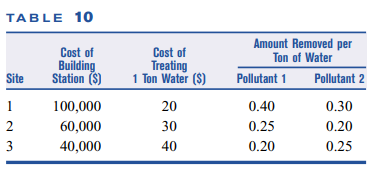

# Conjuntos

$ i = \text{Estaciones indexada por } i$

$ j = \text{Contaminante indexado por } j$

## Parámetros

$ CV_{i} = \textrm{Costo de tratar el agua en la estación } i$

$ CF_{i} = \textrm{Costo fijo de colocar la estación } i $

$ RE_{ij} = \textrm{Porcentaje de eliminación de contaminante }j \textrm{ en la estación }i $

$ P_{j} = \textrm{Cantidad de contaminante }j \textrm{ permitido } $

## Variables de decisión

$ x_{i} = \textrm{Cantidad de agua tratada en la estación } i $

$ y_{i} = \textrm{1 se utiliza la estación } i \textrm{, 0 lo contrario} $

## Función Objetivo

$$\textrm{Min } z = \sum_{i = 1}^{n} CV_{i}\: x_{i} + \sum_{i = 1}^{n} CF_{i}\: y_{i}$$

#$ Restricciones

Debe de mantenerse un nivel de contaminación,

$$ \sum_{i = 1}^{n} x_{i} RE_{ij} \geq P_{j}, \forall j $$

Restricción de flujo de que si no hay estación, no hay agua tratada,

$$ x_{i} \leq M y_{i}, \forall i $$

In [ ]:
#Se instala la libreria
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 18.4 MB/s eta 0:00:00


In [ ]:
#Se importa la libreria
from pulp import *

In [ ]:
#Conjuntos
estaciones = range(3)
contaminantes = range(2)

In [ ]:
#Parámetros

CV = [20, 30, 40]

CF = [100000, 60000, 40000]

RE = [[0.4, 0.25, 0.20], [0.3, 0.2, 0.25]]

P = [80000, 50000]

In [ ]:
# Crear la instancia del modelo
model = LpProblem(name="Momiss_River_Pollution", sense=LpMinimize)

# Inicialización de las variables de decisión
X = LpVariable.dicts("X", (estaciones), 0, None, LpInteger)
Y = LpVariable.dicts("Y", (estaciones), 0, 1, LpInteger)

# Función objetivo
model += lpSum([CV[i] * X[i] for i in estaciones]) + lpSum([CF[i] * Y[i] for i in estaciones])


# Agregar las restricciones

for j in contaminantes:
    model += lpSum([RE[j][i] * X[i] for i in estaciones]) >= P[j]

for i in estaciones:
    model += X[i] <= 1000000000 * Y[i]

# Resolver el problema
model.solve()

# Imprimir el estado del problema
print("Status:", LpStatus[model.status])

# Imprimir las variables
for v in model.variables():
    print(v.name, "=", v.varValue)

# Imprimir la función objetivo
print("Costos totales = $", value(model.objective))

Status: Optimal
X_0 = 200000.0
X_1 = 0.0
X_2 = 0.0
Y_0 = 1.0
Y_1 = 0.0
Y_2 = 0.0
Costos totales = $ 4100000.0
